<a href="https://colab.research.google.com/github/supertime1/PPG_DSP/blob/main/Verily_Interview_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.DSP


1. Real part and imaginary part of fft

2. FFT plot

        #import numpy as np
        fft_real = abs(np.fft.rfft(ps2, 512))
        fft_req = np.fft.rfftfreq(512)

*   DFT can only be performed with finite length with discrete data; 
    without using window, repeat signals cannot be well represented in amplitude function
*   zero-padding is added to the end of orignal signal to keep the windowing in a constant length

3. what is energy and power in signal 
    a. energy: the area under the curve (e.g. fft spectrum area)
    b. power: the y axis (e.g. fft rms)


3. IIR FIR?
        *   IIR is faster because lower order is needed to achieve same sharp level of slope, but less stable 
        *   While all fitlers cause time delays to original signal (the sharper the filter, the longer the delay), FIR has a constant time delay to orginal signal, while IIR has different time delay at different frequency (largest in cut-off frequency)
        *   Time delay can be removed by zero-phase filtering (pass signal to filter forward and backward), but at the cost of doubled computation and more attenuation
        *   Most common Types:
       
            *   butterworth (only in IIR) has a wide transition width (less sharp slope) so the time delay is minimized
            *   hanning in FIR, narrowest transition band


4. Explain Hample filter?
        a. use meadian absolute deviation to find the outlier
5. Nyquest rate vs Nyquest frequency
        *   Nyquest rate: 2 x sampling frequency, the minimum frequency that is needed to fully represent the signal in frequency domain
        *   Nyquest frequency: 0.5 x sampling frequency, the maximum frequency (bandwidth) in FFT plot 


7. In general, DSP interview question
8. Autopower vs Power Spectral Density (PSD)
        *   Autopower: use for sinuous signal (sine wave)
        *   PSD: use for random signal by normalizing the autopower by sampling frequency

9. How to calculate RMS?
        *   Use RMS for FFT (sine wave) to represent the equvalent stedady state energy level (better than the average amplitude, which is zero for sina wave)
        *   If windows is applied, choose 1.63 (hanning) with amplitude of each frequecy for energy correction when calculating RMS

10. why hanning window in FFT: good balance between frequency resolution and amplitude accuracy





##2.Machine Learning

1. Data 

*   Missing data: imputation (mean, regression) dropping
*   Medical data challenge: not enough labeled data, label accuracy, label representation (may need to collect from different demographics)

2. Algorithm:

*   SVM:
        a. primal and dual form (The dual problem is faster to solve than the primal one when the number of training instances is smaller than the number of features); dual form also makes kernel trick possible

        b. output of an SVM classifier is the distance to the decision boundary, but this socre can be turned into probablity by fitting it into a logistic regression model
        c. kernel applications: use matrix multipication to transform the low dimensional features into higher dimensional space, instead of to transform each sample's feature one by one. This reduces the computation complexity from O(n**2) to O(n). It allows the SVM to run algorithm in high dimensional space efficiently
*   KNN and K-Means:


    *   A large value of K in KNN can lead underfit and a small value of K can lead to overfit
    *   To choose K in K-means, 
        use elbow method (calculate the Within-Sum-SquaredError): plot WSS vs k, and choose the k that WSS starts to diminish; 
        or find the biggest Silhouette score: (b-a)/max(a,b) where a is mean intra-cluster distance and b is the mean nearest-cluster distance 

*   Decision tree: 

    *   Gini Impurity = 1 - sum(p_i_k), where p_i_k is the ratio of class k instances among the training instances in the i-th node; Gini impurity is 0 if all instance belongs to one class

    *   Entropy: sum((p_i_k)*log(p_i_k))
    
    *   How to find optimal threshold and feature: sort each feature by its value (n times) and try the midpoint of every two values in a feature (m times) as threhold; 
    *   training: O(n x m x log(m)), prediction: O(log(m)), where **m** is number of instances and **n** is number of features 
    *   Reduce the **max_depth** or increase the **min_samples_leaf** to regularize the model by reducing the overfitting (low bias and high variance)


*   Randomforest: bootstrap, bagging (reduce variance), pasting, boosting,  stacking, extra-tree (random selecting the threshold, faster in training but same in making prediction as Randomforest)
*   Adaboost (train next estimator by increasing the misclassified samples from previous estimator), GradBoost (train next estimator by using the residual error from previous estimator) XGBoost

3. Bias vs. Variance

*   Regularization techniques: l1 and l2, Elastic Net

4. Others:


*   curse of dimensionality: the vector of samples are sparse, cause overfitting



*   PCA and t-SNE

        *   PCA: 
        a. Calculate the eigenvectors by singular vector decomposition(SVD) and select the eigenvectors with largest eigenvalues; 
        b. can train a small regression model to recover from PCA to orignial image
        c. Vanilla PCA; incremental PCA; random PCA; kernel PCA;
        d. PCA is fast that means it can be chained with other dimension reduction algorithm to reduce the dimension fast;
        *   t-SNE: compute the similarity of features in high dimensional space called H, and compute the similarity of mapped features in a lower dimensional space called L, 
        use gradient descent to find the smallest value of H/L


*   Clustering algorithm: 
        a. K-means, DBSCAN (for every instance scan its nearby points with a defined range, this forms a core; if no points nearby, this is anormly data)
        b. Application: dimension reduction; semi-supervised learning; anormaly detection (trained on data with ourliers); novelty detection (trained on clean data); segmentations;
        c. label probagation (part of semi-supervised learning)
        d. active learning (e.g. uncertainty sampling: train a model on a labeled dataset, then use human expert to label unlabeled data with lowest confidence given by the model)
 


*   How to compute confidence score in classification tasks?


      *  interval = z * sqrt( (error * (1 - error)) / n)
      n is the number of samples; z is the number of standard deviation from normal distribution;


*   Bayes' Theorem; Naive Bayes classifier;
    1. Assumption: feature is independent; feature importance is equal
    2. https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c
    3. P(A|B) x P(B)  = P(B|A) x P(A)


*   Generative model vs discriminative model

  https://www.quora.com/What-is-a-generative-algorithm

5. Data types: csv vs JSON vs XML (tree-like structure with for key-value paris, and it is more verbose and bigger than csv)


6. Logistic regression model equation

7. Autoregression model: x(t+1) = b + b1 x(t-1) + b2 x(t-2);
8. ARIMA model (https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/#:~:text=So%20what%20exactly%20is%20an,used%20to%20forecast%20future%20values.)

    Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)










##3.Deep Learning

1. Why don't use LSTM/RNN/GRU:

*   Very long gradient path: vanishing gradient problem (gradient clipping); why use tanh in RNN instead of Relu (fight against gradient and output exploding)
*   RNN is hard to deal with long term dependency, LSTM and GRU can help but with limitation






2. Optimizers:


*   batch GD, SGD, mini-batch GD (all about how many training instances are used to calculate the gradient)
*   Momentum: add a history of previous weight update
*   Nesterov trick: add beta*momentum in cost function J(theta), by calculating the gradient in (current location + momentum direction), assuming the momentum direction in general is pointing to global minimal
*   AdaGrad: scale down the gradient vector of the steepest dimension
*   RMSProp: add a beta parameter to AdaGrad, to prevent scaling down too fast
*   Adam: Adaptive + Momentum -> combining RMSProp with momentum
*   NAdam: Adam with Nesterov trick

3. Activation functions:

*   Sigmoid, tanh
*   ReLu and Leaky-ReLu: ReLu is used to solve the vanishing gradient problem in Sigmoid and tanh; however, it always outputs 0 when input is negative, causing a vanishing gradient (gradient is infinitely small, 0 in this case) and also a dying neurons (output is constant (doesn't matter if it is 0 or not) and there is no way to change it since the gradient is 0); leaky-ReLu is designed to solve the dying neurons problem
*   ELU: a better version of Leaky-Relu since the gradient around 0 is smoother
*   SELU: scaled-ELU, use it when:
    *   Layers are in sequence (no skip connection, no RNN)
    *   Weights needs to be initialized with LeCunn initialization
    *   Best to use it in Dense layer, may be helpful in CNN
    *   Input features needs to be normalized with mean 0 and std 1

4. Vanishing/Exploding gradient:
*   https://ayearofai.com/rohan-4-the-vanishing-gradient-problem-ec68f76ffb9b


2. CNN: 
        a.(W+2K-P)/S
        b. Layer normalization (in RNN, normalize along the feature axis) vs batch normalization vs local response normalization (normalize a small local region across features)
        c. depthwise convolution: almost half of the computation but less parameters to work with; (i.e. faster and less accurate)
        d. full convolutional layer: replace the full connected layer by a CNN, so that if the input image size is bigger, the output is bigger meaning YOLO.
        
3. RNN:
        a. input dimension: (batch size, time steps, feature dimensions)
            output: (batch size, time steps, number of neurons)
        b. stateful RNN: use the state from previous training iteration for the next one
        c. for automatic translation, plain sequence-to-sequence RNN translates one by one, whereas encoder-deconder RNN 'see' the sentence as a whole then process it
        d. use padding to handle variable-length input, and use end-of-sequence token to handle variable-length output
4. LSTM: input gate, output gate, cell state, forget gate

5. GRU: reset gate, update gate

6. Attention: 
        a. dot-product attention (including self-attention); concatenate attention; 
        b. in decoder time, the current decoder state and the full output of the encoder are processed by an alignment model that outputs an alignment score for each input time step. The score indicates which part of the input is most relevant to the current decoder time step. 

###NLP



*   Tokenization method:


> 


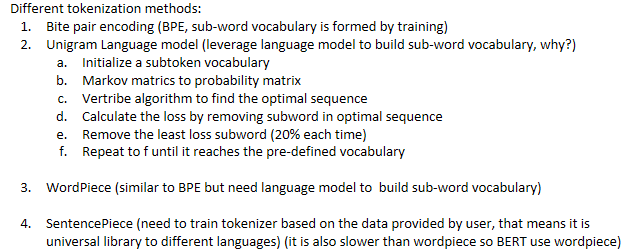





*   AdamW in BERT



##4.Projects

###PPG

1. Why PPG in ear: advantages and disadvantages?

  *   Adv: 
        
            *   less motion artefacts from arm movement; 
            *   Optimal vascular structure for BP (arterioles): resistance vessels: pressure = force / area;
            *   fixed distance from heart;
            *   highest blood perfusion (volume of blood per unit time (blood flow) per unit tissue mass);
            *   most metrics in one spot (HR, temperature...)
             
  *   Dis: 
  
            *   micro motion
            *   limited space



2. Perfusion index for different applications: red > 0.5% for SpO2, NIR > 1% for SpO2; 

> In wrist-based applications, PI values range from 0.02% for a very weak pulse to 2% for an extremely strong pulse. We can get around 0.5% from Floyer prototype

3. PWV (pulse wave velocity); PTT (pulse transit time); PVC (premature ventricle contraction)



###AF



*   Domain Knowledge learning from Cardiologist


    > Example 1: how often to trigger the PPG-based AF algorithm: because of power limitation, only needs to trigger the AF detection 1 min/hour


    > Example 2: model should be tailored to have a low false-positive: reduce the burden of hospital; 


    > Example 3: Labeling of PPG data: use Lead-I ECG patch to collect the data; data will be processed first by a algorithm from the ECG provider and then verified by the clinical teams from Stanford


*   How to recover signals from motion artifacts:


    > If the final model is MA-tolerated: we can either use accelerometer with classic DSP algorithm such as SpaMA to reconstruct the PPG signal by removing the motion artifacts OR use CNN to denoise the PPG signal

    > If the final model is MA-free: we can simply remove the PPG data with a lot of motion artifacts from ACC

*   How to label PPG data
*   How to save the data: 

    > save data every 30min and upload to a cloud database: MongoDB; In case the data collection is not successful during the middle of a day


*   How to ensure patient compliance:


    > Check the data everyday: write scripts to examine the data saved daily on the cloud platform: check signal quality or ratio of missing data


    > APP indicator: PPG with low perfusion index meaning patient could falsely fit the hearing aid or the fitting turns to bad during the middle of the test


*   Modeling


    > Data preprocessing: 
        1. data argumentation (overlap data to create more samples); 
        2. resampling to overcome the imbalanced data; 
        3. spectrogram to trun the data into frequency domain


    > model:
        1. MobileNet, ResNet (draw the structure of each)



*   Evaluation:


    > Confusion matrix: precision-recall, F1 score, sensitivity (recall), specificity, TPR



*   Visualization


    > t-SNE


    > Saliency map: derivetive of input to output


    > Grad-CAM: 
    1. take the last spatial maps (the last layer before flatten);
    2. calculate the gradient of each feature in each spatial map (this tells you how important each feature is to the final output), and sum them to give each spatial map a weight
    3. aggregate all weighted - spatial maps
    4. Resize the spatial maps to original image size (7x7 -> 128x128)
    5. Overlap it to orginal image






















###BP


*   Source of data

    *   MIMIC database: 
        1.   Database: 2.4TB WFDB, 10,000+ patients, 125Hz, 8 bit PPG, ABP data
        2.   Signal processing pipeline: 
            *   PPG: remove small files -> remove files with flatline -> hampel filter remove outliers -> rescale -> bandpass filter 

            *   ABP: remove small files -> remove files with flatline -> hampel filter remove outliers -> beat segementation -> remove flat peak -> extact SBP and DBP groundtruth from peak and valleys
    *   Proprietary data:
        *   How to collect them: PPG sensor with blood pressure culf measurement



*   How to validate the signal quality of PPG for BP:


    *   PPG signal fundamentals for BP: 
        1. If the final use case is patient trigger the measurement and ECG is avaialble: you can use both ECG and PPG to leverage on the PTT
        2. If the final use case is patient trigger the measurement and ECG is not avaialble: use processed PPG alone (raw, first, second derivative, spectrogram) hoping with a smaller model or raw PPG alone with some simple processing with a relatively larger model (use CNN to extract the features)
        3. If the final use case is measure BP on the background: need accelerometer data as well)
    *   Some general index: PI, SNR



*   BP modeling









##5.Statistics

1. Specificity (TNR), Sensitivity (Recall, TPR), Precision(PPV), F1 score, FPR (1-Specificity)


*   Use F1 socre when TN doesn't matter or having an imbalanced data


2. ROC curve, precision-recall curve
3. T-test, ANOVA test


    > Assumptions of both t-test and Anova test
        1. Normal distribution of samples 
        2. Variance within each samples is the same
        3. Independent observations


4. P-value, Z-score (how many std from null-hypothesis mean), t-score, F-score
(https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/more-significance-testing-videos/v/small-sample-hypothesis-test)
5. Kai squared distribution:
        1. test Condition: 
            a. expected counts should be larger than 5 for each outcome; 
            b. random sampling from a large population with normal distribution
            c. sample size is less than 10% of population size, to make sure samples are independent from each other
6. Confidence interval vs. Prediction interval

*   CI = y +- t x std(y) x sqrt(1/n + (x - mu)^2 / ((n - 1) x std(x)^2) 
*   PI = y +- t x std(y) x sqrt(1 + 1/n + (x - mu)^2 / ((n - 1) x std(x)^2)

    where std(y) = sqrt(sum(y - y_hat)^2/(n-2))

7. Monte-Calo to calculate rectangular area





##6.Algorithm Skill

### Algorithm

1. Two pointer (select five from each to practice)
2. Sorting
3. Greedy
4. Binary Search
5. Divide and Conquer
6. Searching (DFS, BFS, backtracking)
7. Dynamic Programming
8. Math



### Data Structure


1.   Linked list
2.   Binary tree
3.   Queue and Stacks
4.   Hash Table
5.   String
6.   Matrix
7.   Graph
8.   Bits manipulation





##7.Python packages

###Pandas

In [ ]:
#column names, rename column names, lowercase all columns
df.columns
df.rename(columns = {'abcd':'ab',
                     'hello':'world'},
          inplace = True)
df.columns = [col.lower() for col in df]
#first, last, and info of dataset
df.head(5)
df.tail(5)
df.info()
#shape,drop duplicate
df.drop_duplicates(inplace=True,keep=first)
df.shape
#choose one column or one item
df.iloc[:,2]
df['column_name_1']
#choose one row
df.iloc[12]
df.loc['row_name_2']
#check NA value, drop NA rows or columns
df.isnull().sum()
df = df.dropna() #drop row
df = df.dropna(axis=1) #drop column
#some basic stats
df.describe()
df['column_name_1'].value_counts()
df.corr()
#conditions
movies_df[
    ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 8.0)
    & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
]
#apply functions
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

movies_df["rating_category"] = movies_df["rating"].apply(rating_function)
#or
movies_df["rating_category"] = movies_df["rating"].apply(lambda x: 'Good' if x >= 0.8 else 'bad')

###Matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})
#by directly specify columns
movies_df.plt(kind='scatter', x ='rating', y='revenue_millions', title='Revenue(millions) vs. Rating')
#select specific column
movies_df['rating'].plot(kind='hist', title='Rating')
#boxplot
movies_df.boxplot(column='revenue_millions', by='rating_catetory');

##8.Techinical Screening Questions:

1. Introduce your current role/how you change from chemical background to data science/ML
2. Introduce the experience on DSP: what filter you use/why IIR and what is the band pass cut-off frequency you select and why?
3. Once you have a clean data, explain the model you built for AF/HR/BP?
4. What if you have an unbalanced data and do you deal with it?
5. How do you collaborate with clinical stuffs
6. Coding: giving x = np.random.rand(100), build a window function to calculate the mean of 10 points, and function will return the same length as x


    *   Solution: apply the moving average and for the last ten points, apply a gradually reduced window size

#9. Onsite Interview Questions

###Programming
1. Write a function to calculate mean and variance of the data; add a new sample to exsiting mean and variance, calculate the new mean and variance (Variance = E(x^2) - (E(x))^2); what if the data cannot fit into to the memory?
2. Give a = {'USA': 300, "Canada": 30, "China": 1500}, write a function to print the country name with the probability of its population ratio
3. Group A and B are people with different heights, what algorithm can you think of to classify a new people into either group A or B? (KNN, time complexity, how to optimize the time complexity of your algorithm) what if A and B has different sample size; 


###Statistics
1. T-test hypothesis formation;
2. Give the power and calcuate the requried sample size
3. Feature transform (transform non-sense numeric data into categorical data)
4. How to end the clinical trial earlier if it is testing the efficacy of a new drug

###Machine learning
1. Describe the AF model; what is the input dimension; 
2. What is the most difficult part to delveop your model;
3. How to train a model with imbalanced data; how to evaluate it;

